In [4]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Lets play with some data

In [3]:
classification_data = pd.read_csv("classification_data.csv")

In [5]:
classification_data.head()

,x,y,gp
0,12.896678,1.217664,A
1,12.877074,3.820658,A
2,-4.839803,7.819414,B
3,4.575332,0.043999,A
4,10.868601,2.199082,A


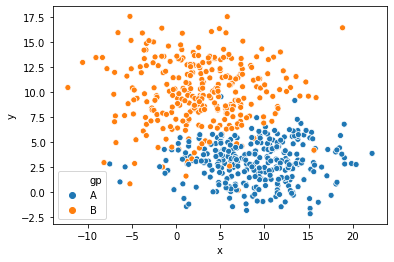

In [6]:
# Lets plot a scatterplot
sns.scatterplot(x='x', y='y', hue='gp', data=classification_data)

# Classification with Nearest Neighbour

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
?cross_val_score

In [17]:
X = classification_data[['x','y']]
y = classification_data['gp']

In [18]:
model1 = KNeighborsClassifier()
cross_val_score(model1, X, y, cv=5, scoring='accuracy')

array([0.95      , 0.93333333, 0.925     , 0.91666667, 0.91666667])

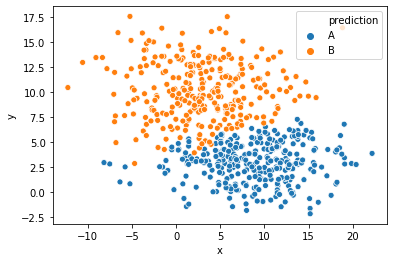

In [24]:
# Plotting the predicted class
result = model1.fit(X,y)
classification_data['prediction'] = result.predict(X)
sns.scatterplot(x='x', y='y', hue='prediction', data=classification_data)

In [29]:
model2 = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model2, X, y, cv=5, scoring='accuracy')

array([0.925     , 0.91666667, 0.94166667, 0.875     , 0.925     ])

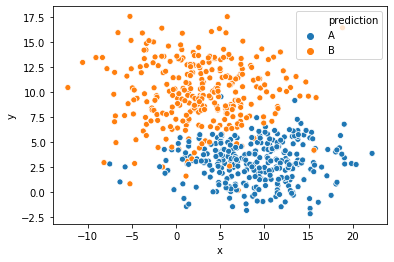

In [30]:
result = model2.fit(X,y)
classification_data['prediction'] = result.predict(X)
sns.scatterplot(x='x', y='y', hue='prediction', data=classification_data)

# Classification with Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [45]:
model3 = DecisionTreeClassifier(max_depth=5)
cross_val_score(model3, X, y, cv=5, scoring='accuracy')

array([0.925     , 0.925     , 0.93333333, 0.93333333, 0.925     ])

In [46]:
result = model3.fit(X,y)

[Text(1026.6328125, 996.6, 'X[1] <= 6.264\nentropy = 0.5\nsamples = 600\nvalue = [300, 300]'),
 Text(614.671875, 815.4000000000001, 'X[0] <= 3.8\nentropy = 0.174\nsamples = 322\nvalue = [291, 31]'),
 Text(340.03125, 634.2, 'X[1] <= 4.282\nentropy = 0.464\nsamples = 63\nvalue = [40, 23]'),
 Text(209.25, 453.0, 'X[0] <= -1.434\nentropy = 0.314\nsamples = 41\nvalue = [33, 8]'),
 Text(104.625, 271.79999999999995, 'X[1] <= 2.84\nentropy = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(52.3125, 90.59999999999991, 'entropy = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(156.9375, 90.59999999999991, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(313.875, 271.79999999999995, 'X[0] <= 1.1\nentropy = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(261.5625, 90.59999999999991, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(366.1875, 90.59999999999991, 'entropy = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(470.8125, 453.0, 'X[0] <= -0.122\nentropy = 0.434\nsamples = 22\nvalue = [7, 15]'),
 T

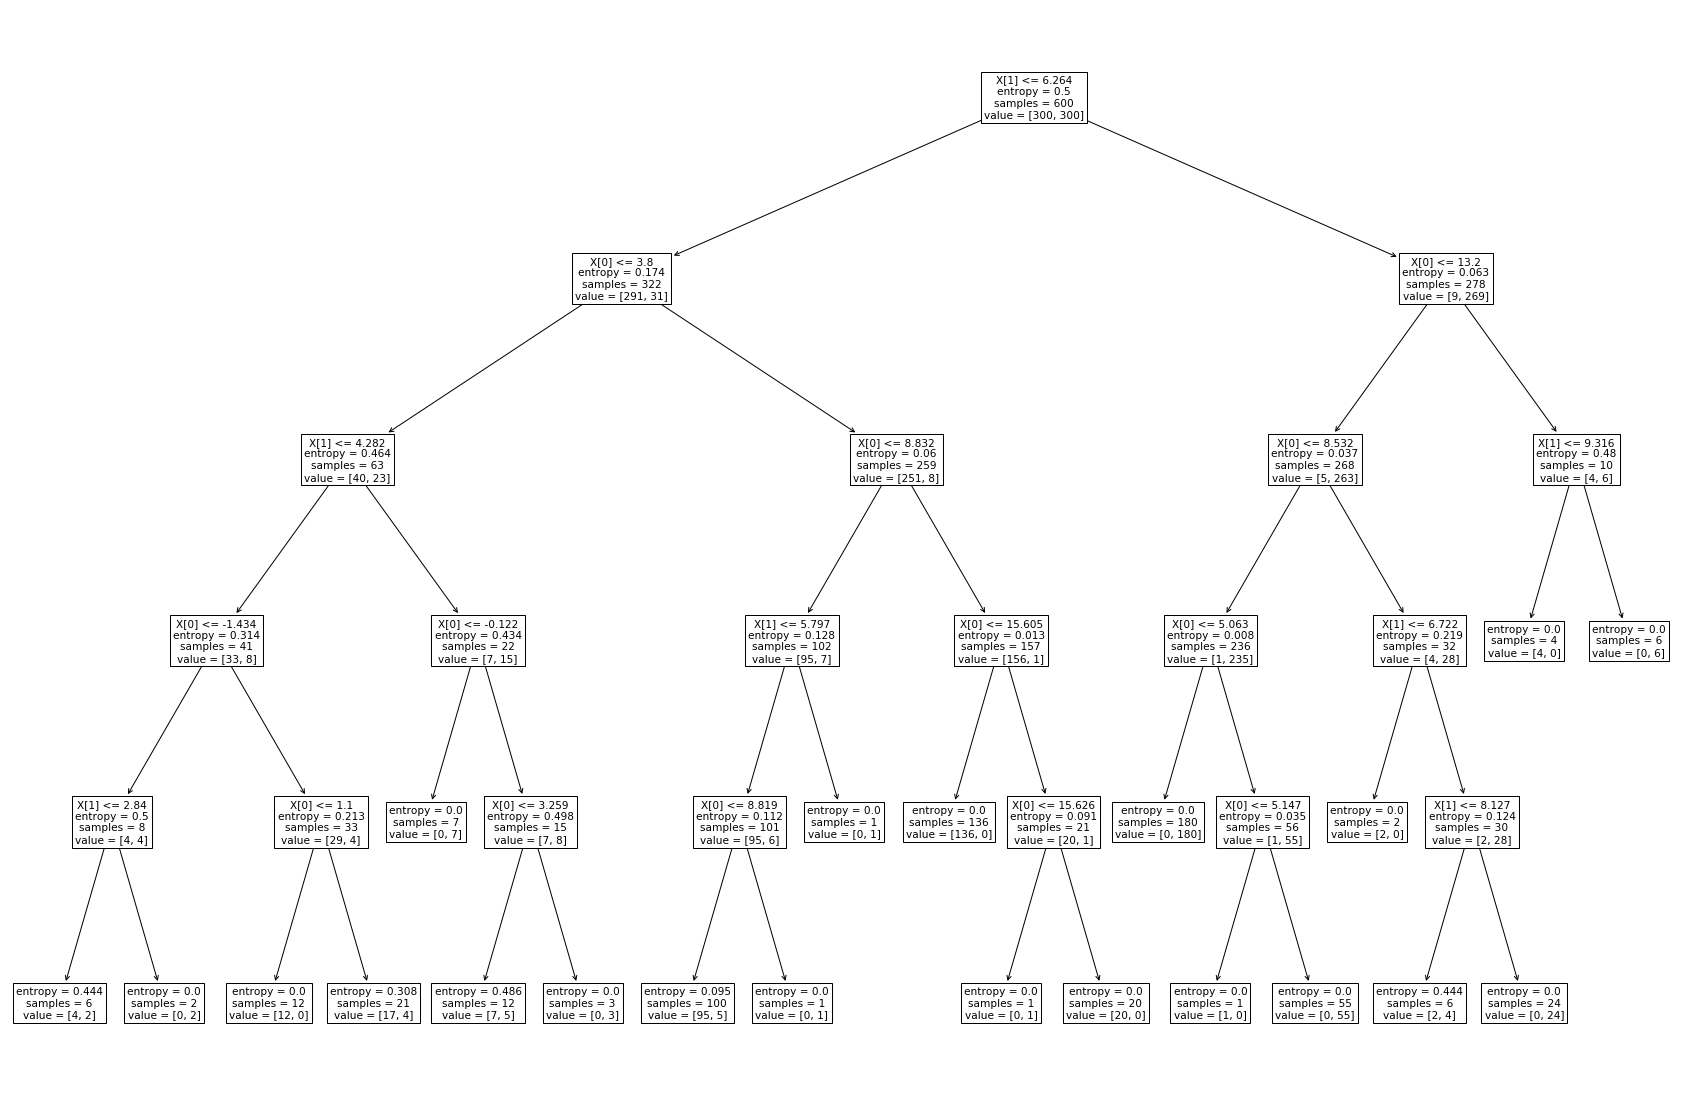

In [48]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30, 20))
tree.plot_tree(result) 

# SVM

In [49]:
from sklearn.svm import SVC

In [51]:
model4 = SVC()
cross_val_score(model4, X, y, cv=5)

/Users/choy/anaconda/envs/ml4bpython/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/choy/anaconda/envs/ml4bpython/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/choy/anaconda/envs/ml4bpython/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/choy/a

array([0.95833333, 0.925     , 0.94166667, 0.9       , 0.925     ])

# Hyperparameters Tuning 

In [53]:
for k in [1,2,3,4,5,6,7,8,9,10]:
    model1 = KNeighborsClassifier(n_neighbors=k)
    print(k)
    print(cross_val_score(model1, X, y, cv=5, scoring='accuracy').mean())

1
0.9166666666666666
2
0.93
3
0.9416666666666667
4
0.9316666666666666
5
0.9283333333333333
6
0.9316666666666666
7
0.9349999999999999
8
0.9366666666666665
9
0.9366666666666668
10
0.9366666666666668


## Using sklearn built-in to help doing hyper-parameters search

In [56]:
from sklearn.model_selection import GridSearchCV

In [64]:
model1 = KNeighborsClassifier()
param_grid = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10]}
search = GridSearchCV(model1, param_grid=param_grid, cv=5)

In [66]:
result = search.fit(X, y)

In [68]:
result.best_params_

{'n_neighbors': 3}

In [69]:
result.cv_results_

{'mean_fit_time': array([0.00428438, 0.00225811, 0.00231423, 0.00249057, 0.0023941 ,
        0.00220408, 0.00234365, 0.00280151, 0.0028657 , 0.00295525]),
 'std_fit_time': array([1.45303512e-03, 2.43777139e-05, 9.19463468e-05, 5.12711788e-04,
        2.19410109e-04, 2.20923343e-05, 2.16737202e-04, 5.29362154e-04,
        4.83500995e-04, 4.06260961e-04]),
 'mean_score_time': array([0.00821714, 0.00487485, 0.00473919, 0.00489297, 0.00515242,
        0.0047369 , 0.00483985, 0.00572219, 0.00610604, 0.00583973]),
 'std_score_time': array([2.00588605e-03, 3.59479295e-04, 6.30671178e-05, 1.71603259e-04,
        6.05290398e-04, 5.36090948e-05, 9.36682728e-05, 6.94108261e-04,
        2.74282462e-04, 2.24722107e-04]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbor

# Exercise 
Try tuning the parameter "C" of SVM 

In [70]:
?SVC

In [77]:
model1 = SVC(gamma='auto')
param_grid = {"?": [?, ?, ?]}
search = GridSearchCV(model1, param_grid=param_grid, cv=5)
result = search.fit(X, y)

In [78]:
result.best_params_

{'C': 0.2}

In [79]:
result.cv_results_

{'mean_fit_time': array([0.01079659, 0.00966659, 0.01049075, 0.01187043, 0.01259432,
        0.01029696, 0.01189847]),
 'std_fit_time': array([0.00212448, 0.00035694, 0.00081755, 0.0005805 , 0.00079333,
        0.00044024, 0.0003371 ]),
 'mean_score_time': array([0.00332279, 0.00194025, 0.00191803, 0.00182796, 0.00180006,
        0.00171356, 0.0019599 ]),
 'std_score_time': array([9.63828984e-04, 4.42005155e-05, 4.08495014e-05, 1.61499332e-05,
        8.91220002e-05, 4.49598021e-05, 3.35355224e-04]),
 'param_C': masked_array(data=[0.1, 0.2, 0.3, 0.5, 1, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1},
  {'C': 0.2},
  {'C': 0.3},
  {'C': 0.5},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.95833333, 0.95833333, 0.94166667, 0.94166667, 0.95833333,
        0.93333333, 0.93333333]),
 'split1_test_score': array([0.94166667, 0.93333333, 0.93333333, 0.925     , 0.